In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import e
from scipy.integrate import quad
import scipy.special as sp
from time import time

**Integral**

In [2]:
def f(x):
  return e**(2*x) + e**(x/2) + e**(-2*x) + e**(-x/2)

def integral_f(a,b):
  x1 = 0.5*(e**(2*a) - e**(-2*a)) + 2*(e**(a/2) - e**(-a/2))
  x2 = 0.5*(e**(2*b) - e**(-2*b)) + 2*(e**(b/2) - e**(-b/2))
  return x2 - x1

numbers = np.arange(0.1,100.1,0.1)
time_scipy = []
time_integral = []

In [3]:
for i in numbers:
  start = time()
  quad(f,0,i)
  end = time()
  time_scipy.append(end-start)

for i in numbers:
  start = time()
  integral_f(0,i)
  end = time()
  time_integral.append(end-start)

dict = {
    'time_scipy': time_scipy,
    'time_integral': time_integral
}

df = pd.DataFrame(dict)

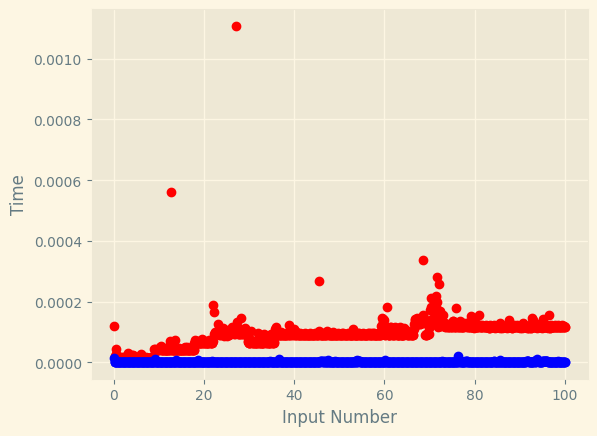

In [4]:
plt.style.use('Solarize_Light2')
plt.scatter(numbers,df['time_scipy'],color='r')
plt.scatter(numbers,df['time_integral'],color='b')
plt.xlabel('Input Number')
plt.ylabel('Time')
plt.show()

In [5]:
time_scipy_2 = []
time_integral_2 = []

for i in numbers:
  start = time()
  quad(f,0,i)
  end = time()
  time_scipy_2.append(end-start)

for i in numbers:
  start = time()
  integral_f(0,i)
  end = time()
  time_integral_2.append(end-start)

dict_2 = {
    'time_scipy': time_scipy_2,
    'time_integral': time_integral_2
}

df_2 = pd.DataFrame(dict_2)

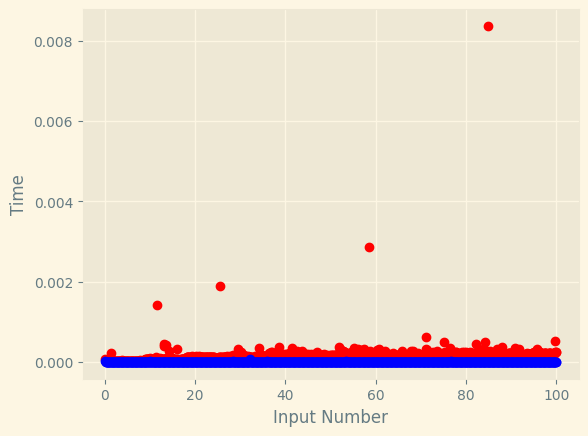

In [6]:
plt.style.use('Solarize_Light2')
plt.scatter(numbers,df_2['time_scipy'],color='r')
plt.scatter(numbers,df_2['time_integral'],color='b')
plt.xlabel('Input Number')
plt.ylabel('Time')
plt.show()

In [7]:
time_scipy_3 = []
time_integral_3 = []

for i in numbers:
  start = time()
  integral_f(0,i)
  end = time()
  time_integral_3.append(end-start)

for i in numbers:
  start = time()
  quad(f,0,i)
  end = time()
  time_scipy_3.append(end-start)

dict_3 = {
    'time_scipy': time_scipy_3,
    'time_integral': time_integral_3
}

df_3 = pd.DataFrame(dict_3)

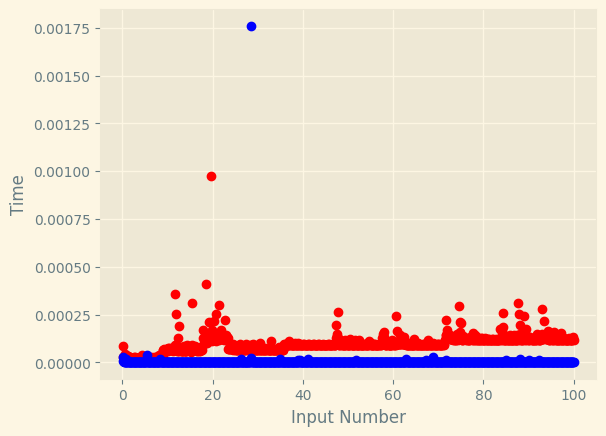

In [8]:
plt.style.use('Solarize_Light2')
plt.scatter(numbers,df_3['time_scipy'],color='r')
plt.scatter(numbers,df_3['time_integral'],color='b')
plt.xlabel('Input Number')
plt.ylabel('Time')
plt.show()

**Cumulative Normal Distribution**

In [9]:
def standard_normal(x,u=5,o=2):
    return (1/(o*np.sqrt(2*np.pi))) * np.exp(-(((x-u)/o)**2)/2)

def cndf(x,u=5,o=2):
    return 0.5 * (1 + sp.erf(((x-u)/o)/ np.sqrt(2)))

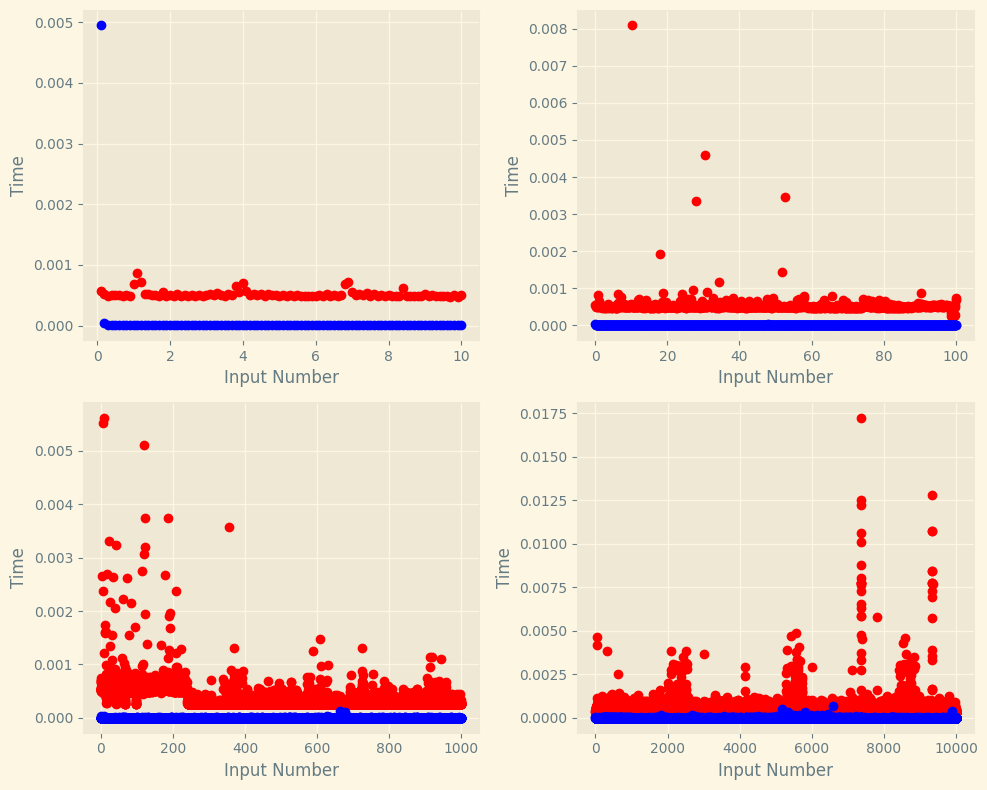

In [10]:
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

plot = [
    [0,0],
    [0,1],
    [1,0],
    [1,1]
]

for i in range(0,4):
  time_scipy = []
  time_erf = []
  numbers = np.arange(0.1, (10**(i + 1)) + 0.1, 0.1)

  for j in numbers:
    start = time()
    quad(standard_normal,-np.inf,i)
    end = time()
    time_scipy.append(end-start)

  for j in numbers:
    start = time()
    cndf(i)
    end = time()
    time_erf.append(end-start)

  dict_cdf = {
      'time_scipy': time_scipy,
      'time_erf': time_erf
  }

  df_cdf = pd.DataFrame(dict_cdf)


  ax[plot[i][0],plot[i][1]].scatter(numbers,df_cdf['time_scipy'],color='r')
  ax[plot[i][0],plot[i][1]].scatter(numbers,df_cdf['time_erf'],color='b')
  ax[plot[i][0],plot[i][1]].set_xlabel('Input Number')
  ax[plot[i][0],plot[i][1]].set_ylabel('Time')

plt.tight_layout()
plt.show()